In [24]:
# pip install pandas-datareader
# pip install yfinance

from pandas_datareader import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# 데이터 얻기

import yfinance as yfin # exception handling

yfin.pdr_override() # exception handling

start_date = '2014-01-01'
end_date = '2018-01-01'
# goog_data = data.DataReader('GOOG', 'yahoo', start_date, end_date)
goog_data = data.get_data_yahoo("GOOG", start_date, end_date) # exception handling
goog_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,27.782366,27.839401,27.603037,27.724083,27.724083,73129082
2014-01-03,27.770908,27.818977,27.520098,27.521841,27.521841,66917888
2014-01-06,27.721344,27.867046,27.557707,27.828691,27.828691,71037271
2014-01-07,28.019974,28.385853,27.924334,28.365179,28.365179,102486711
2014-01-08,28.543015,28.575891,28.226450,28.424210,28.424210,90036218
...,...,...,...,...,...,...
2017-12-22,53.055500,53.209999,52.972000,53.006001,53.006001,15102000
2017-12-26,52.903500,53.006001,52.509998,52.837002,52.837002,15212000
2017-12-27,52.869499,52.918499,52.402500,52.468498,52.468498,25438000


In [26]:
# 데이터 준비 - 시그널

goog_data_signal = pd.DataFrame(index=goog_data.index)
goog_data_signal['price'] = goog_data['Adj Close']
goog_data_signal['daily_difference'] = goog_data_signal['price'].diff()
goog_data_signal['signal'] = 0.0
goog_data_signal['signal'][:] = np.where(goog_data_signal['daily_difference'][:] > 0, 1.0, 0.0)
goog_data_signal['positions'] = goog_data_signal['signal'].diff()
goog_data_signal

,price,daily_difference,signal,positions
Date,,,,
2014-01-02,27.724083,NaN,0.0,NaN
2014-01-03,27.521841,-0.202242,0.0,0.0
2014-01-06,27.828691,0.306850,1.0,1.0
2014-01-07,28.365179,0.536488,1.0,0.0
2014-01-08,28.424210,0.059031,1.0,0.0
...,...,...,...,...
2017-12-22,53.006001,-0.175499,0.0,0.0
2017-12-26,52.837002,-0.168999,0.0,0.0
2017-12-27,52.468498,-0.368504,0.0,0.0


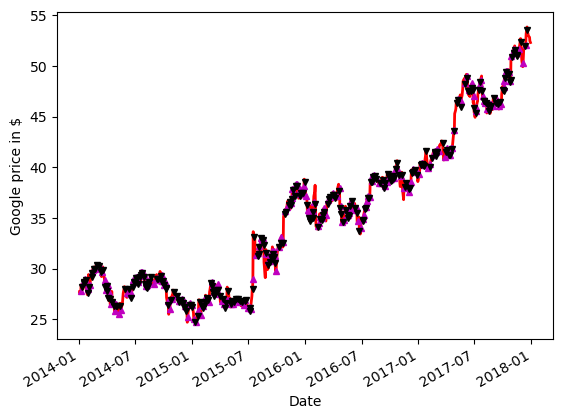

In [27]:
# 시그널 시각화

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data_signal['price'].plot(ax=ax1, color='r', lw=2.)

ax1.plot(goog_data_signal.loc[goog_data_signal.positions == 1.0].index,
         goog_data_signal.price[goog_data_signal.positions == 1.0],
         '^', markersize=5, color='m')

ax1.plot(goog_data_signal.loc[goog_data_signal.positions == -1.0].index,
         goog_data_signal.price[goog_data_signal.positions == -1.0],
         'v', markersize=5, color='k')

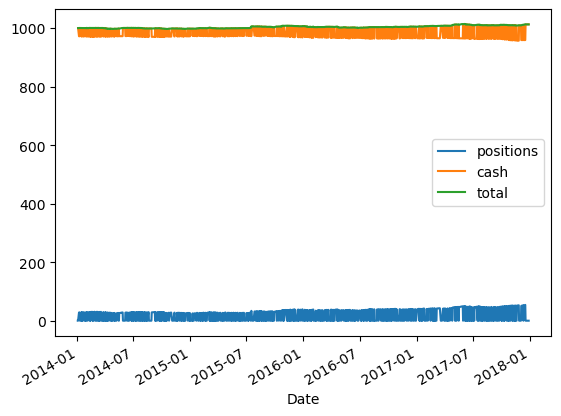

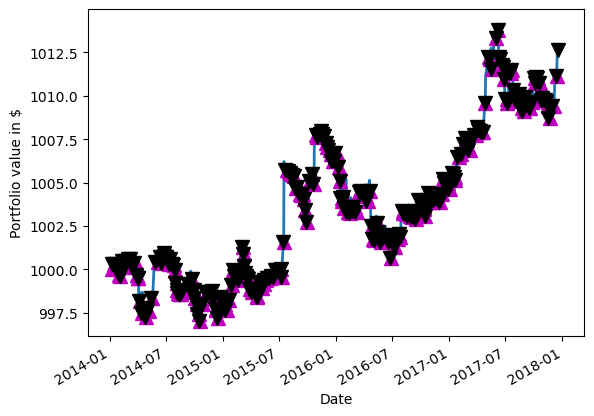

In [40]:
# 백테스팅

initial_capital= float(1000.0)

positions = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)

positions['GOOG'] = goog_data_signal['signal']
portfolio['positions'] = (positions.multiply(goog_data_signal['price'], axis=0))
portfolio['cash'] = initial_capital - (positions.diff().multiply(goog_data_signal['price'], axis=0)).cumsum()
portfolio['total'] = portfolio['positions'] + portfolio['cash']
portfolio.plot()

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1, lw=2.)
ax1.plot(portfolio.loc[goog_data_signal.positions == 1.0].index,portfolio.total[goog_data_signal.positions == 1.0],'^', markersize=10, color='m')
ax1.plot(portfolio.loc[goog_data_signal.positions == -1.0].index,portfolio.total[goog_data_signal.positions == -1.0],'v', markersize=10, color='k')